In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import copy

In [4]:
Bike_Rent_data = pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Regression Datasets/BikeRentData.csv')

In [5]:
Bike_Rent_data.head()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [6]:
Bike_Rent_data.drop_duplicates()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,48,61


In [7]:
Bike_Rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
Unnamed: 0    17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025629946148>]],
      dtype=object)

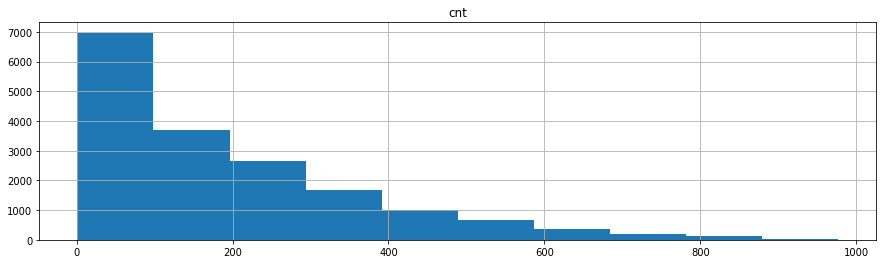

In [8]:
Bike_Rent_data.hist('cnt', figsize=(15,4))

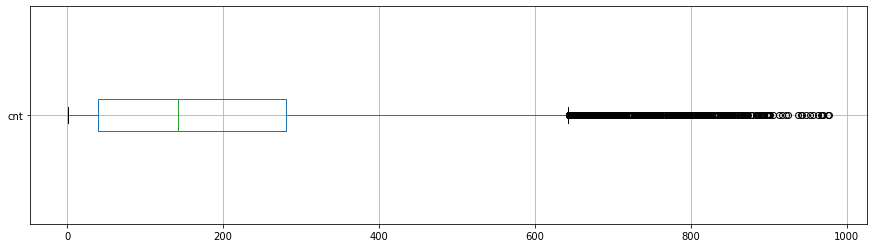

In [9]:
Bike_Rent_data.boxplot('cnt',vert=False,figsize=(15,4))

In [10]:
Bike_Rent_data.corrwith(Bike_Rent_data['cnt'], axis=0)

Unnamed: 0    0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
registered    0.972151
cnt           1.000000
dtype: float64

In [11]:
Bike_Rent_data.rename(columns={'Unnamed: 0':'named'},  inplace=True)

In [12]:
Bike_Rent_data.isnull().sum()

named         0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [13]:
Bike_Rent_data.nunique()

named         17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
registered      776
cnt             869
dtype: int64

In [14]:
Bike_Rent_data.describe(include=np.float64)

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


In [15]:
Bike_Rent_data_ML=copy.deepcopy(Bike_Rent_data)

In [16]:
cat_cols=['season','mnth','weekday','workingday','weathersit','yr','hr']
Selected_cols=['registered','temp','hum','workingday','weathersit','cnt']
Target_var=['cnt']

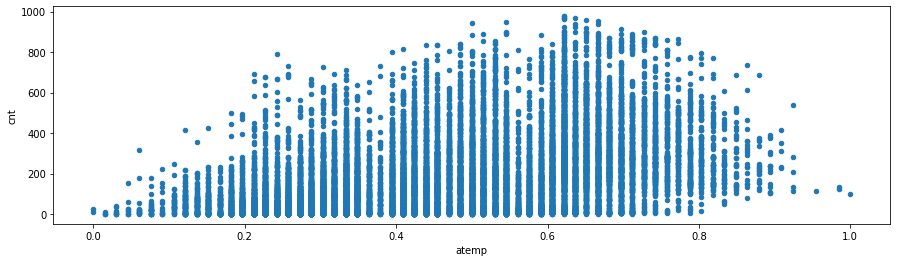

In [17]:
## Continuous  Distribution
Bike_Rent_data_ML.plot.scatter(x='atemp',y='cnt', figsize=(15,4))

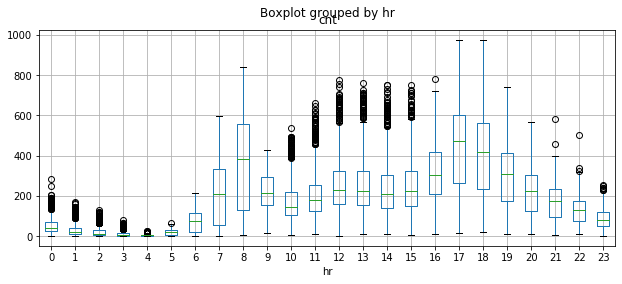

In [18]:
## Categorical Distribution
Bike_Rent_data_ML.boxplot(column='cnt', by='hr', figsize=(10,4))

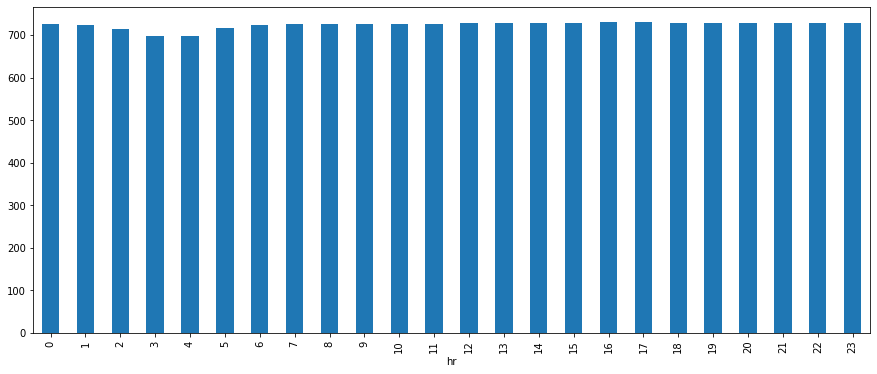

In [20]:
Bike_Rent_data_ML.groupby(['hr']).size().plot(kind='bar',figsize=(15,6))

In [36]:
con1=Bike_Rent_data_ML['hum']==0.0
con2=Bike_Rent_data_ML['cnt']<200
Deleterow1=Bike_Rent_data_ML[con1&con2].index
Bike_Rent_data_ML=Bike_Rent_data_ML.drop(Deleterow1)

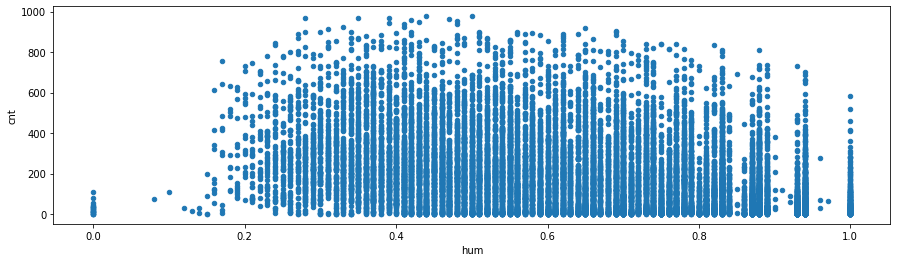

In [19]:
Bike_Rent_data_ML.plot.scatter(x='hum',y='cnt', figsize=(15,4))

In [20]:
from scipy.stats import f_oneway
for i in cat_cols:
    CategoricalAnnova=Bike_Rent_data_ML.groupby(i)['cnt'].apply(list)
    AnnovaResult=f_oneway(*CategoricalAnnova)
    print("The p value of",i," is ",(AnnovaResult[1]).round(5))
    if(AnnovaResult[1].round(5)>0.05):
        print("The values of ",i,"not correrelated with target variable")
    else:
        print("The values of ",i,"correrelated with target variable")

The p value of season  is  0.0
The values of  season correrelated with target variable
The p value of mnth  is  0.0
The values of  mnth correrelated with target variable
The p value of weekday  is  0.0019
The values of  weekday correrelated with target variable
The p value of workingday  is  7e-05
The values of  workingday correrelated with target variable
The p value of weathersit  is  0.0
The values of  weathersit correrelated with target variable
The p value of yr  is  0.0
The values of  yr correrelated with target variable
The p value of hr  is  0.0
The values of  hr correrelated with target variable


In [21]:
Selected_cols=['registered','temp','hum','workingday','weathersit','mnth','weekday','atemp','cnt']
Target_var=['cnt']
cat_cols=['season','mnth','weekday','workingday','weathersit','yr']

In [22]:
Bike_Rent_data_model=pd.DataFrame(Bike_Rent_data_ML,columns=Selected_cols)

In [23]:
Bike_Rent_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
registered    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
workingday    17379 non-null int64
weathersit    17379 non-null int64
mnth          17379 non-null int64
weekday       17379 non-null int64
atemp         17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [24]:
Bike_Rent_data_model.isnull().sum()

registered    0
temp          0
hum           0
workingday    0
weathersit    0
mnth          0
weekday       0
atemp         0
cnt           0
dtype: int64

In [25]:
# deleting Outliers
Q1=Bike_Rent_data_model.quantile(0.25)
Q3=Bike_Rent_data_model.quantile(0.75)
IQR=Q3-Q1
print(IQR)


registered    186.0000
temp            0.3200
hum             0.3000
workingday      1.0000
weathersit      1.0000
mnth            6.0000
weekday         4.0000
atemp           0.2879
cnt           241.0000
dtype: float64


In [26]:
Bike_Rent_data_model.shape

(17379, 9)

In [27]:
Bike_Rent_data_model_ML=Bike_Rent_data_model[~((Bike_Rent_data_model<(Q1-1.5*IQR))|(Bike_Rent_data_model>(Q3+1.5*IQR))).any(axis=1)]

In [28]:
Bike_Rent_data_model_ML.shape

(16585, 9)

In [31]:
Bike_Rent_data_model_ML=pd.DataFrame(Bike_Rent_data_model,columns=Sel_cols)

In [32]:
Bike_Rent_data_model_ML.corrwith(Bike_Rent_data_model_ML['cnt'], axis=0)

registered    0.972151
temp          0.404772
workingday    0.030284
weathersit   -0.142426
hum          -0.322911
weekday       0.026900
mnth          0.120638
cnt           1.000000
dtype: float64

In [136]:
Predictors=['registered','mnth']
Target=['cnt']
Sel_cols=['registered','temp','workingday','weathersit','hum','weekday','mnth','cnt']


In [137]:
## Standardisation

from sklearn import preprocessing

P_std=preprocessing.StandardScaler()
T_std=preprocessing.StandardScaler()


X=P_std.fit_transform(Bike_Rent_data_model_ML[Predictors].values)
y=T_std.fit_transform(Bike_Rent_data_model_ML[Target].values)



In [118]:
## Train and Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=65045)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [155]:
## Linear Regression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=61254)
mlr=LinearRegression()
PredictionModel=mlr.fit(X_train,y_train)
prediction=PredictionModel.predict(X_test)
predictedvar=T_std.inverse_transform(prediction)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)
Test_table=pd.DataFrame(X_origin, columns=Predictors)
Test_table['target']=Y_origin
Test_table['predictedtarget']=predictedvar
Test_table['APE']=np.abs((Y_origin - predictedvar) / Y_origin) * 100

print("The R2 values is",metrics.r2_score(y_train,PredictionModel.predict(X_train)))
print('Accuracy on Test Data:',100- (np.median(np.abs((Y_origin -predictedvar) / Y_origin)) * 100))



The R2 values is 0.9452667443752155
Accuracy on Test Data: 84.22810985577354


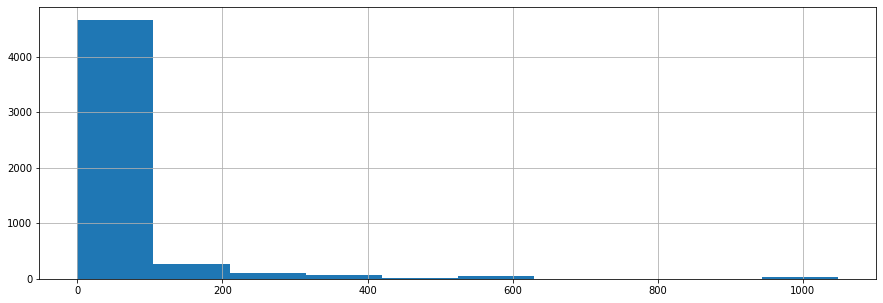

In [86]:
PredictedTable['ape'].hist(figsize=(15,5))

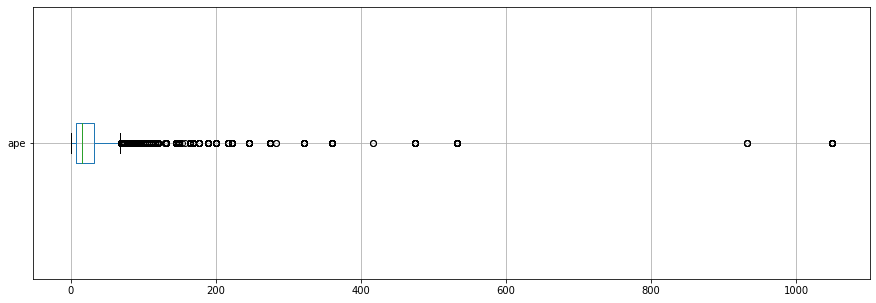

In [87]:
PredictedTable.boxplot('ape',figsize=(15,5),vert=False)

In [74]:
#Train and Test again for  

Z=Bike_Rent_data_model_ML[Predictors].values
w=Bike_Rent_data_model_ML[Target].values

Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size=0.25, random_state=65045)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12165, 7)
(5214, 7)
(12165, 1)
(5214, 1)


In [153]:
## Lasso Regrresion
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=65045)

lass=Lasso(alpha=0.1,max_iter=20)
PredictionModel=lass.fit(X_train,y_train)
Predictions=PredictionModel.predict(X_test)
predictedvar=T_std.inverse_transform(predictions)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)

print("The R2 values is",metrics.r2_score(y_train,PredictionModel.predict(X_train)))
print('Accuracy on Test Data:', 100- (np.mean(np.abs((Y_origin -predictedvar) / Y_origin)) * 100))


The R2 values is 0.9328448171129337
Accuracy on Test Data: -154772.19628761345


In [110]:
## Ada Boost Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=65045)


dtree=DecisionTreeRegressor(max_depth=2)
Ada =AdaBoostRegressor(base_estimator=dtree,n_estimators=5,learning_rate=0.01)

PredictionModel=Ada.fit(X_train,y_train)
Predictions=PredictionModel.predict(X_test)
predictedvar=T_std.inverse_transform(predictions)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)

print("The R2 values is",metrics.r2_score(y_train,PredictionModel.predict(X_train)))
X2 = sm.add_constant(X_train) 
Model=sm.OLS(y_train,X2)
Adj_R_sq=Model.fit()
print("rsquared_adj :",Adj_R_sq.rsquared_adj)
print('Accuracy on Test Data:', 100 -(np.mean(np.abs((Y_origin-predictedvar) /Y_origin)) * 100))






C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The R2 values is 0.8700761805432204
rsquared_adj : 0.9648587583778342
Accuracy on Test Data: -156511.0710673053


rsquared_adj : 0.9648587583778342
R2 Value: 0.6514375140795448
The Accuracy score 90.19609415134087


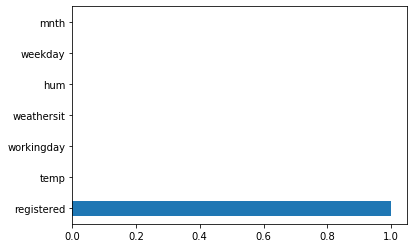

In [109]:
## Decision Tree
from sklearn.tree import DecisionTreeRegressor



dlr=DecisionTreeRegressor(max_depth=1,criterion='mse')
DecisionReg=dlr.fit(X_train,y_train)

Prediction=DecisionReg.predict( X_test)
predictedvar=T_std.inverse_transform(prediction)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)
X2 = sm.add_constant(X_train) 
Model=sm.OLS(y_train,X2)
Adj_R_sq=Model.fit()
print("rsquared_adj :",Adj_R_sq.rsquared_adj)
print('R2 Value:',metrics.r2_score(y_train,DecisionReg.predict(X_train)))
print("The Accuracy score" ,np.median(abs(Y_origin-predictedvar)/Y_origin)*100)

importantfeatures =pd.Series(DecisionReg.feature_importances_, index=Predictors)
importantfeatures.nlargest(10).plot(kind='barh')


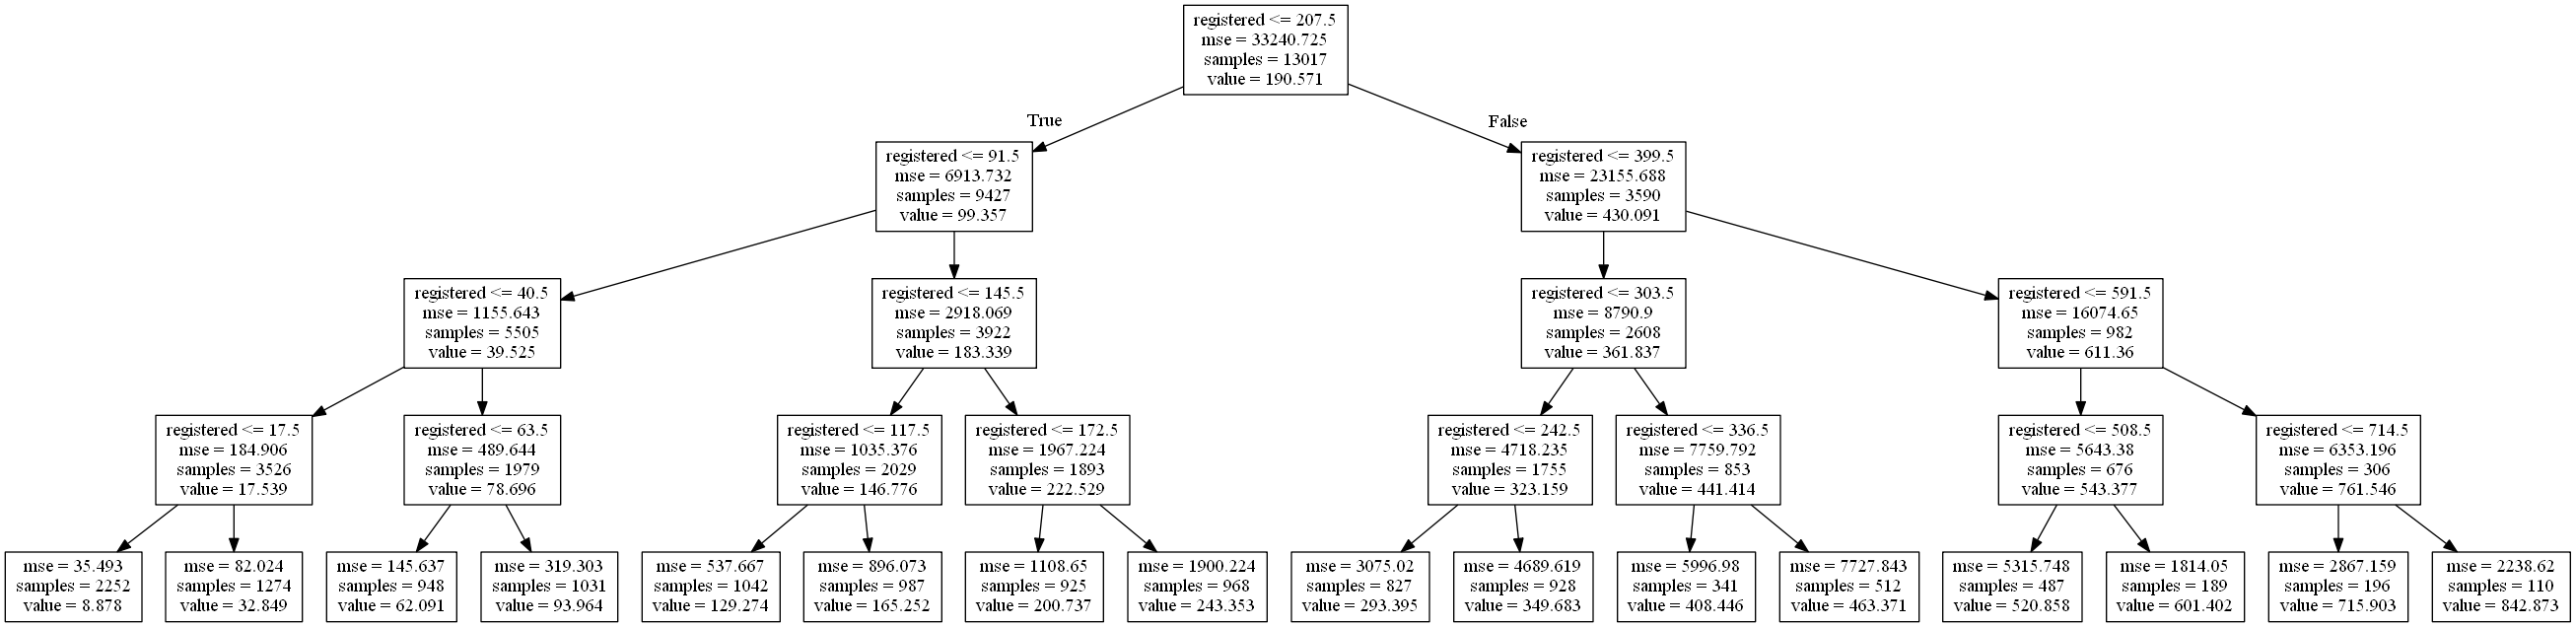

In [100]:
from IPython.display import Image
from sklearn import tree
import pydotplus

Draw_Graph=tree.export_graphviz(DecisionReg,out_file=None,feature_names=Predictors,class_names=Target)
Graph=pydotplus.graph_from_dot_data(Draw_Graph)
Image(Graph.create_png())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


rsquared_adj : 0.9446534186651632
R2 Value: 0.6715732400227704
The Accuracy score -19030.070740650794


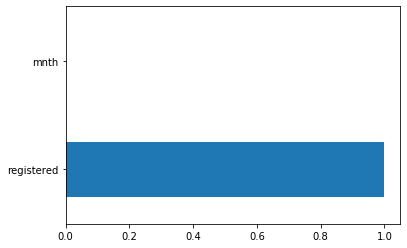

In [152]:
### Random foreest Regressor

from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=65045)

rgf=RandomForestRegressor(n_estimators=10,criterion='mse',max_depth=1)
PredictionModel=rgf.fit(X_train,y_train)
Predictions=PredictionModel.predict(X_test)
predictedvar=T_std.inverse_transform(predictions)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)
X2 = sm.add_constant(X_train) 
Model=sm.OLS(y_train,X2)
Adj_R_sq=Model.fit()
print("rsquared_adj :",Adj_R_sq.rsquared_adj)
print('R2 Value:',metrics.r2_score(y_train,PredictionModel.predict(X_train)))
print("The Accuracy score",100-np.median(abs(Y_origin-predictedvar)/Y_origin)*100)

importantfeatures =pd.Series(PredictionModel.feature_importances_, index=Predictors)
importantfeatures.nlargest(10).plot(kind='barh')





C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rsquared_adj : 0.9648587583778342
R2 Value: 0.6514375140795448
The Accuracy score 90.19609415134087


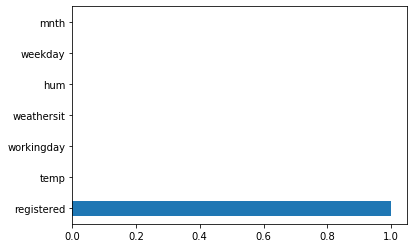

In [115]:
## Light BGM
from lightgbm import LGBMRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=65045)


lgb=LGBMRegressor(learning_rate=0.01,n_estimators=50,max_depth=-1)

PredictionModel=lgb.fit(X_train,y_train)
Prediction=PredictionModel.predict( X_test)
predictedvar=T_std.inverse_transform(prediction)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)
X2 = sm.add_constant(X_train) 
Model=sm.OLS(y_train,X2)
Adj_R_sq=Model.fit()
print("rsquared_adj :",Adj_R_sq.rsquared_adj)
print('R2 Value:',metrics.r2_score(y_train,DecisionReg.predict(X_train)))
print("The Accuracy score" ,np.median(abs(Y_origin-predictedvar)/Y_origin)*100)

importantfeatures =pd.Series(PredictionModel.feature_importances_, index=Predictors)
importantfeatures.nlargest(10).plot(kind='barh')






[15:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: -0.05200617751764902
The Accuracy score -19030.070740650794


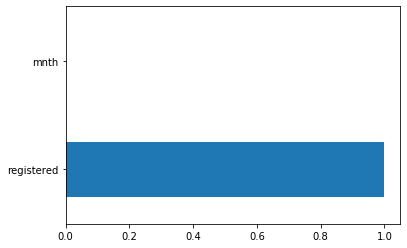

In [149]:
## Xgboost 

from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=65045)



xgb=XGBRegressor(max_depth=2, learning_rate=0.01, n_estimators=10, objective='reg:linear', booster='gbtree')

PredictionModel=xgb.fit(X_train,y_train)
Predictions=PredictionModel.predict(X_test)
predictedvar=T_std.inverse_transform(predictions)
Y_origin=T_std.inverse_transform(y_test)
X_origin=P_std.inverse_transform(X_test)

print('R2 Value:',metrics.r2_score(y_train,PredictionModel.predict(X_train)))
print("The Accuracy score" ,100- (np.median(np.abs((Y_origin - predictedvar) / Y_origin)) * 100))

importantfeatures =pd.Series(PredictionModel.feature_importances_, index=Predictors)
importantfeatures.nlargest(10).plot(kind='barh')

